No trash detected.


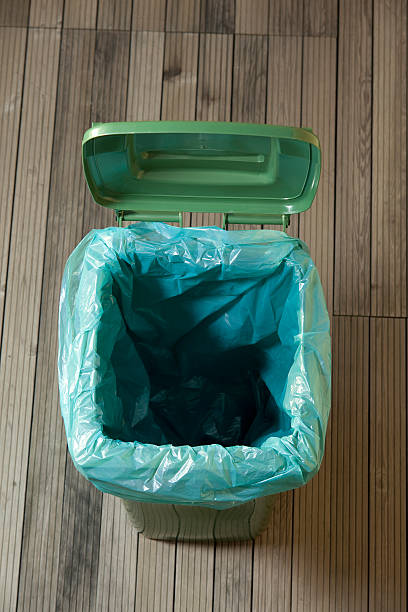

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def detect_trash(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_blue = np.array([100, 50, 50])
    upper_blue = np.array([140, 255, 255])

    mask_can = cv2.inRange(hsv, lower_blue, upper_blue)

    kernel = np.ones((5, 5), np.uint8)
    mask_can = cv2.erode(mask_can, kernel, iterations=1)
    mask_can = cv2.dilate(mask_can, kernel, iterations=1)

    contours, _ = cv2.findContours(mask_can, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        return image, False
    largest_contour = max(contours, key=cv2.contourArea)

    mask_trash = cv2.bitwise_not(mask_can)
    trash_contours, _ = cv2.findContours(mask_trash, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    has_trash = len(trash_contours) > 0

    image_with_contours = image.copy()
    cv2.drawContours(image_with_contours, [largest_contour], -1, (0, 255, 0), 2)  # Green for can
    for cnt in trash_contours:
        cv2.drawContours(image_with_contours, [cnt], -1, (0, 0, 255), 2)  # Red for trash

    return image_with_contours, has_trash

image = cv2.imread("/content/drive/MyDrive/bmc/bmc2.jpeg")

if image is None:
    print("Error: Unable to load image.")
else:
    result_image, has_trash = detect_trash(image)

    if has_trash:
        print("Trash detected!")
    else:
        print("No trash detected.")

    cv2_imshow(result_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
